In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv('./Kaggle/Titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The idea of the titanic is to predict whether or not a passenger would survive given their characteristics. The target is then 'Survived'

# Nulls

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 891 lines in total and 687 cabin lines are null, it looks like an id of the cabin that the passengers were.
Does whoever is null indicate that the passenger was in third class and, therefore, did not have a cabin?
We have a column that indicates this class.

In [5]:
titanic[titanic.Pclass==3].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            136
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64

There may be a correlation, but there are passengers with zero cabin who were not in that class. As we don't know if this null can be important or not, let's create a boolean dummy column called 'cabin_is_null' indicating if it is null or not.

In [6]:
titanic['cabin_is_null'] = np.where(titanic['Cabin'].isnull(), 1, 0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_is_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [7]:
titanic['age_is_null'] = np.where(titanic['Age'].isnull(), 1, 0)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_is_null,age_is_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


# Cardinality

How many categories are there in categorical features

In [8]:
titanic.nunique()

PassengerId      891
Survived           2
Pclass             3
Name             891
Sex                2
Age               88
SibSp              7
Parch              7
Ticket           681
Fare             248
Cabin            147
Embarked           3
cabin_is_null      2
age_is_null        2
dtype: int64

In [9]:
titanic.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
cabin_is_null      int32
age_is_null        int32
dtype: object

The Survived column is our target.

The PassengerID column is an ID, that is, it has 1 for each passenger. The same thing happens with Name.

It makes sense to reassemble categorical columns with many categories, since regardless of the terget value, it assumes a different category (ID or name column, for example).
Categorical:

The Ticket column appears to have many categories. Therefore, this column is unlikely to be useful to us. We can remove it. The Cabin column has fewer categories, but this is because the vast majority are null. Therefore, what is not null has a different category. So we can remove it as well since we've already treated the nulls as an extra column.

The other columns either have few categories or are numerical, so we can move on.

# Removing Useless Columns

In [10]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_is_null,age_is_null
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0
887,1,1,female,19.0,0,0,30.0000,S,0,0
888,0,3,female,NaN,1,2,23.4500,S,1,1
889,1,1,male,26.0,0,0,30.0000,C,0,0


# Filling Nulls

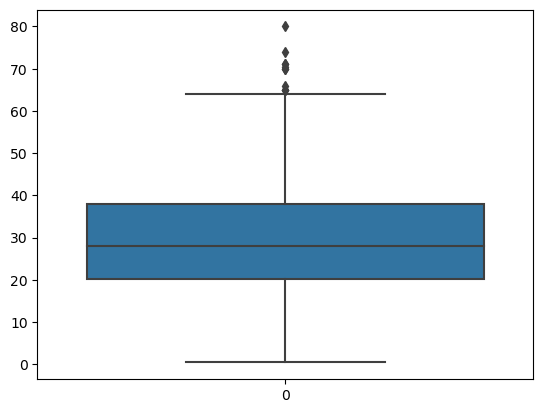

In [11]:
sns.boxplot(titanic['Age']);

The column already has some outliers (and they are not absurd values). Therefore, we can treat it with the median

In [12]:
# filling Age with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [15]:
titanic.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
cabin_is_null    0
age_is_null      0
dtype: int64

In [16]:
# drop the nulls
titanic = titanic.dropna()

In [17]:
titanic.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
cabin_is_null    0
age_is_null      0
dtype: int64

In [18]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_is_null,age_is_null
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0
887,1,1,female,19.0,0,0,30.0000,S,0,0
888,0,3,female,28.0,1,2,23.4500,S,1,1
889,1,1,male,26.0,0,0,30.0000,C,0,0


# Category Encoding

Many models do not accept categorical (string) columns. So we need to pass all categories to numbers.

In [19]:
titanic[['Sex', 'Embarked']].nunique()

Sex         2
Embarked    3
dtype: int64

As there are very few categories, we can use OneHotEnconding

In [20]:
titanic_final = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])
titanic_final

,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_is_null,age_is_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,1,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,0,1,1,0,0


# Split Train and Test

In [21]:
# separating what is feature and what is target
X = titanic_final.drop(columns='Survived')
y = titanic_final.Survived

In [22]:
# split 70% train and 30% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
X_train

,Pclass,Age,SibSp,Parch,Fare,cabin_is_null,age_is_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
531,3,28.0,0,0,7.2292,1,1,0,1,1,0,0
674,2,28.0,0,0,0.0000,1,1,0,1,0,0,1
182,3,9.0,4,2,31.3875,1,0,0,1,0,0,1
727,3,28.0,0,0,7.7375,1,1,1,0,0,1,0
572,1,36.0,0,0,26.3875,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
117,2,29.0,1,0,21.0000,1,0,0,1,0,0,1
723,2,50.0,0,0,13.0000,1,0,0,1,0,0,1
366,1,60.0,1,0,75.2500,0,0,1,0,1,0,0
465,3,38.0,0,0,7.0500,1,0,0,1,0,0,1


In [24]:
X_test

,Pclass,Age,SibSp,Parch,Fare,cabin_is_null,age_is_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
27,1,19.0,3,2,263.0000,0,0,0,1,0,0,1
731,3,11.0,0,0,18.7875,1,0,0,1,1,0,0
262,1,52.0,1,1,79.6500,0,0,0,1,0,0,1
701,1,35.0,0,0,26.2875,0,0,0,1,0,0,1
694,1,60.0,0,0,26.5500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
875,3,15.0,0,0,7.2250,1,0,1,0,1,0,0
606,3,30.0,0,0,7.8958,1,0,0,1,0,0,1
357,2,38.0,0,0,13.0000,1,0,1,0,0,0,1
317,2,54.0,0,0,14.0000,1,0,0,1,0,0,1


# Scaling of Numerical Features

In [25]:
# if we are going to use algorithms based on gradient descent (logistic regression, for example), we have to do the scaling
# of the training and testing features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
pd.DataFrame(X_test_scaled, columns=X_train.columns)

,Pclass,Age,SibSp,Parch,Fare,cabin_is_null,age_is_null,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.233476,0.375,0.4,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.132948,0.000,0.0,0.071435,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.648153,0.125,0.2,0.302852,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.434531,0.000,0.0,0.099952,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.748681,0.000,0.0,0.100951,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262,1.0,0.183212,0.000,0.0,0.027471,1.0,0.0,1.0,0.0,1.0,0.0,0.0
263,1.0,0.371701,0.000,0.0,0.030022,1.0,0.0,0.0,1.0,0.0,0.0,1.0
264,0.5,0.472229,0.000,0.0,0.049430,1.0,0.0,1.0,0.0,0.0,0.0,1.0
265,0.5,0.673285,0.000,0.0,0.053232,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Data Balancing (if needed)

Do it only in training, not in testing. The test must be pure

In [27]:
titanic_final.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

The data is unbalanced, but not too much. In that case, I recommend testing: make a balanced model and another one without any balance. See how each one performed afterwards and choose the best one.

In [28]:
# balancing to reduce the larger class
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)

X_train_scaled_bal, y_train_bal = under_sampler.fit_resample(X_train_scaled, y_train)

In [28]:
y_train_bal.value_counts()

0    239
1    239
Name: Survived, dtype: int64

In [29]:
# anteriormente era:
y_train.value_counts()

0    383
1    239
Name: Survived, dtype: int64